# **Environment Setup & Core**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns

In [ ]:
dataset = pd.read_csv('/content/Catalyst Database.csv')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Catalyst                  100 non-null    object 
 1   Paper_title               100 non-null    object 
 2   Authors                   100 non-null    object 
 3   Journal                   100 non-null    object 
 4   DOI                       95 non-null     object 
 5   Discharge_capacity_mAh_g  100 non-null    float64
 6   Measured_overpotential_V  100 non-null    float64
 7   DeltaE_adsorption_eV      100 non-null    float64
 8   Reaction_barrier_eV       100 non-null    float64
 9   Measurement_conditions    100 non-null    object 
 10  Performance_reward        100 non-null    object 
dtypes: float64(4), object(7)
memory usage: 8.7+ KB


# Data Preprocessing

In [ ]:
print(dataset.isnull == True)

False


In [ ]:
dataset.head()

,Catalyst,Paper_title,Authors,Journal,DOI,Discharge_capacity_mAh_g,Measured_overpotential_V,DeltaE_adsorption_eV,Reaction_barrier_eV,Measurement_conditions,Performance_reward
0,Cu-TCPP (Cu-porphyrin MOF nanosheet),Highly Efficient Cu-Porphyrin-Based MetalOrgan...,Y. Xu et al.,Small (2022),10.1002/smll.202203917,20393.000,1.800,1.299,0.444,Capacity at 100 mA/g; overpotential measured a...,High
1,COF-Ru@CNT (porphyrin COF hybridized with Ru@CNT),CovalentOrganicFrameworkBased LiCO2 Batteries,X. Li et al.,Advanced Materials (2019),10.1002/adma.201905879,27348.000,1.240,1.299,0.444,200 mA/g for capacity; limited-capacity cutoff...,High
2,Ru nanoparticles on carbon (in-situ ultrafine ...,"Transient, in situ synthesis of ultrafine ruth...",Y. Qiao et al.,Energy & Environmental Science (2019),10.1039/C8EE03506G,11495.000,1.430,1.299,0.444,0.1 A/g cycling for 1.43 V example; limited-ca...,Medium
3,Single-atom Ru (SA-Ru on Co3O4 nanosheets),SingleAtom Ru Implanted on Co3O4 Nanosheets as...,Z. Lian et al.,Advanced Science (2021),10.1002/advs.202102550,1643.937,0.501,1.299,0.444,various current densities; DFT + Bader charge ...,High
4,Mo2C (molybdenum carbide),Unraveling Reaction Mechanisms of Mo2C as Cath...,C. Yang et al.,Journal of the American Chemical Society (2020),10.1021/jacs.9b12868,2.000,0.800,1.299,0.444,DFT mechanistic study with experimental compar...,Low


In [ ]:
DataFrame = dataset.copy()

In [ ]:
print(DataFrame.isnull().sum())

Catalyst                    0
Paper_title                 0
Authors                     0
Journal                     0
DOI                         5
Discharge_capacity_mAh_g    0
Measured_overpotential_V    0
DeltaE_adsorption_eV        0
Reaction_barrier_eV         0
Measurement_conditions      0
Performance_reward          0
dtype: int64


# **Data Preprocessing**

Drop unnecessary columns (Authors,Journal,DOI)

In [ ]:
DataFrame = DataFrame.drop(columns=['Authors'])

In [ ]:
DataFrame = DataFrame.drop(columns=['Journal'])

In [ ]:
DataFrame = DataFrame.drop(columns=['DOI'])

In [ ]:
DataFrame.head()

,Catalyst,Paper_title,Discharge_capacity_mAh_g,Measured_overpotential_V,DeltaE_adsorption_eV,Reaction_barrier_eV,Measurement_conditions,Performance_reward
0,Cu-TCPP (Cu-porphyrin MOF nanosheet),Highly Efficient Cu-Porphyrin-Based MetalOrgan...,20393.000,1.800,1.299,0.444,Capacity at 100 mA/g; overpotential measured a...,High
1,COF-Ru@CNT (porphyrin COF hybridized with Ru@CNT),CovalentOrganicFrameworkBased LiCO2 Batteries,27348.000,1.240,1.299,0.444,200 mA/g for capacity; limited-capacity cutoff...,High
2,Ru nanoparticles on carbon (in-situ ultrafine ...,"Transient, in situ synthesis of ultrafine ruth...",11495.000,1.430,1.299,0.444,0.1 A/g cycling for 1.43 V example; limited-ca...,Medium
3,Single-atom Ru (SA-Ru on Co3O4 nanosheets),SingleAtom Ru Implanted on Co3O4 Nanosheets as...,1643.937,0.501,1.299,0.444,various current densities; DFT + Bader charge ...,High
4,Mo2C (molybdenum carbide),Unraveling Reaction Mechanisms of Mo2C as Cath...,2.000,0.800,1.299,0.444,DFT mechanistic study with experimental compar...,Low


# **Data Cleaning & Feature Extraction**

This code cleans the messy text in the Catalyst column and extracts useful, structured features for the Machine Learning model.What it does:Normalizes Text: Fixes weird numbers (like $O_2$ vs. $O_2$) and punctuation.Identifies Components: Uses defined lists to find and pull out the Metal Elements and the Structure/Type of the catalyst (e.g., separating "Gold Nanoparticle" into Metal: Au and Structure: NP).Creates New Columns: Generates clean, ready-to-use columns like Metal, Type, and Structure.This transforms confusing text into simple categories the model can understand.

In [ ]:
DataFrame["Catalyst_raw"] = DataFrame["Catalyst"].astype(str)


In [ ]:
SUB_MAP = str.maketrans("₀₁₂₃₄₅₆₇₈₉", "0123456789")
SUP_MAP = str.maketrans("⁰¹²³⁴⁵⁶⁷⁸⁹", "0123456789")

ELEMENTS = set([
    "Ac","Ag","Al","Am","Ar","As","At","Au","Ba","Be","Bh","Bi","Bk","Br","Ca","Cd","Ce","Cf","Cl","Cm","Cn","Co","Cr","Cs","Cu",
    "Db","Ds","Dy","Er","Es","Eu","Fe","F","Fm","Fr","Ga","Gd","Ge","He","Hf","Hg","Ho","Hs","I","In","Ir","K","Kr","La","Li",
    "Lr","Lu","Md","Mg","Mn","Mo","Mt","Na","Nb","Nd","Ne","Ni","No","Np","Os","O","Pa","Pb","Pd","Pm","Po","Pr","Pt","Pu","Ra",
    "Rb","Re","Rf","Rg","Rh","Rn","Ru","S","Sb","Sc","Se","Sg","Si","Sm","Sn","Sr","Ta","Tb","Tc","Te","Th","Ti","Tl","Tm","U",
    "V","W","Xe","Y","Yb","Zn","Zr","C","N","P"
])

NONMETALS = {"H","C","N","O","P","S","Se","F","Cl","Br","I","Si","B"}

FORM_MAP = {
    "single-atom": "SA", "single atom": "SA", "sa-": "SA", " sa ": "SA", " sa": "SA",
    "nanosheet": "NS", "nanosheets": "NS", " ns ": "NS",
    "nanoparticle": "NP", "nanoparticles": "NP", " nps": "NP",
    "nanowire": "NW", "nanowires": "NW"
}

In [ ]:
def normalize_text(s: str) -> str:
    s = str(s).strip()
    if not s:
        return "Unknown"
    s = s.translate(SUB_MAP).translate(SUP_MAP)
    s = re.sub(r"\s+", " ", s)
    s = s.replace("–", "-").replace("—", "-").replace("−", "-")
    # normalize patterns for support markers
    s = re.sub(r"\b(supported on|on)\b", " / ", s, flags=re.IGNORECASE)
    s = s.replace("/on ", "/")
    return s or "Unknown"

def detect_type(s: str) -> str:
    low = s.lower()
    if "mof" in low: return "MOF"
    if "cof" in low: return "COF"
    if "carbide" in low or "mo2c" in low: return "CARBIDE"
    if "oxide" in low or "co3o4" in low: return "OXIDE"
    return "COMPOSITE"  # safe default (never null)

def extract_form(s: str) -> str:
    low = " " + s.lower() + " "
    for k,v in FORM_MAP.items():
        if k in low:
            return v
    if re.search(r"\bSA[-\s]", s):  # e.g., SA-Ru
        return "SA"
    if re.search(r"\bhybrid|\bhybridized|\bcomposite", low):
        return "HYB"
    return "Unknown"  # <-- never "–"

def extract_metals(s: str) -> str:
    tokens = re.findall(r"[A-Z][a-z]?(?:\d+)?", s.replace("@"," ").replace("/"," ").replace("-"," "))
    found = []
    for t in tokens:
        m = re.match(r"([A-Z][a-z]?)", t)
        if not m:
            continue
        el = m.group(1)
        if el in ELEMENTS and el not in found:
            found.append(el)
    if not found:
        return "Unknown"  # <-- never "–"
    found_sorted = sorted(found, key=lambda x: (len(x), x))
    return ",".join(found_sorted) or "Unknown"

def canonicalize_basic(name: str):
    clean = normalize_text(name)
    typ = detect_type(clean)
    form = extract_form(clean)
    metals = extract_metals(clean)
    return clean, metals, typ, form

In [ ]:
res = DataFrame["Catalyst"].astype(str).apply(canonicalize_basic)
DataFrame["Catalyst_clean"] = res.apply(lambda x: x[0])
DataFrame["Metal"] = res.apply(lambda x: x[1])
DataFrame["Type"] = res.apply(lambda x: x[2])
DataFrame["Structure"] = res.apply(lambda x: x[3])


In [ ]:
def clean_metal(val: str) -> str:
    val = (val or "").strip()
    if not val or val.lower() in {"nan"}:
        return "Unknown"
    parts = [p.strip() for p in val.split(",") if p.strip()]
    metals_only = [p for p in parts if p not in NONMETALS]
    # if removal empties it, fallback to first non-empty original token or "Unknown"
    if not metals_only:
        return parts[0] if parts else "Unknown"
    return ",".join(metals_only)


# **Final Data Standardization and Imputation**

This section performs the final cleanup and inference steps to ensure consistency in the Metal and Structure features.

Key Actions:
Refining Metals: Applies the clean_metal function (from the previous step) to the Metal column to remove non-metal elements (like C, N, O), ensuring the column only contains metal symbols.

Structure Inference (infer_structure): Re-runs the structure detection logic on the Catalyst_clean name to fill in any missing Structure values (Unknown).

Imputing 'Bulk': If the Type suggests a standard compound (e.g., OXIDE, CARBIDE) and the Structure is still Unknown, it labels the structure as Bulk (non-nanoscale).

Final Safeguard: Iterates through all new feature columns (Catalyst_clean, Metal, Type, Structure) and replaces any remaining empty or null values (like nan, None, -, –) with the unified placeholder Unknown.

This completes the Feature Engineering by ensuring that no critical categorical data is missing or ambiguous.

In [ ]:
DataFrame["Metal"] = DataFrame["Metal"].astype(str).apply(clean_metal)


In [ ]:
def infer_structure(name_clean: str, current_struct: str) -> str:
    cur = (current_struct or "").strip()
    if cur and cur.lower() not in {"–","-","none","nan",""}:
        return cur
    name = (name_clean or "").lower()
    if re.search(r"\bsingle[-\s]?atom\b|\bsa[-\s]", name):
        return "SA"
    if "nanosheet" in name or "nanosheets" in name or re.search(r"\bns\b", name):
        return "NS"
    if "nanoparticle" in name or "nanoparticles" in name or " nps" in name:
        return "NP"
    if "nanowire" in name or "nanowires" in name:
        return "NW"
    if "hybrid" in name or "hybridized" in name or "composite" in name:
        return "HYB"
    return "Unknown"

In [ ]:
DataFrame["Structure"] = [
    infer_structure(n, s) for n, s in zip(DataFrame["Catalyst_clean"], DataFrame["Structure"])
]

# Fill "Bulk" only when Type suggests non-nano solid and Structure is still Unknown
FILL_BULK_TYPES = {"CARBIDE","OXIDE","ALLOY","COMPOSITE"}
mask_bulk = DataFrame["Type"].isin(FILL_BULK_TYPES) & (DataFrame["Structure"].str.strip().str.lower() == "unknown")
DataFrame.loc[mask_bulk, "Structure"] = "Bulk"

# ---------- Final safeguard: replace any residual blanks/NaNs/“–” with "Unknown" ----------
for col in ["Catalyst_clean","Metal","Type","Structure"]:
    DataFrame[col] = DataFrame[col].astype(str).replace(
        to_replace=[None, "None", "nan", "NaN", "", "–", "-"],
        value="Unknown"
    )

# Show the final Result

In [ ]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Catalyst                  100 non-null    object 
 1   Paper_title               100 non-null    object 
 2   Discharge_capacity_mAh_g  100 non-null    float64
 3   Measured_overpotential_V  100 non-null    float64
 4   DeltaE_adsorption_eV      100 non-null    float64
 5   Reaction_barrier_eV       100 non-null    float64
 6   Measurement_conditions    100 non-null    object 
 7   Performance_reward        100 non-null    object 
 8   Catalyst_raw              100 non-null    object 
 9   Catalyst_clean            100 non-null    object 
 10  Metal                     100 non-null    object 
 11  Type                      100 non-null    object 
 12  Structure                 100 non-null    object 
dtypes: float64(4), object(9)
memory usage: 10.3+ KB


In [ ]:
DataFrame.head()

,Catalyst,Paper_title,Discharge_capacity_mAh_g,Measured_overpotential_V,DeltaE_adsorption_eV,Reaction_barrier_eV,Measurement_conditions,Performance_reward,Catalyst_raw,Catalyst_clean,Metal,Type,Structure
0,Cu-TCPP (Cu-porphyrin MOF nanosheet),Highly Efficient Cu-Porphyrin-Based MetalOrgan...,20393.000,1.800,1.299,0.444,Capacity at 100 mA/g; overpotential measured a...,High,Cu-TCPP (Cu-porphyrin MOF nanosheet),Cu-TCPP (Cu-porphyrin MOF nanosheet),Cu,MOF,NS
1,COF-Ru@CNT (porphyrin COF hybridized with Ru@CNT),CovalentOrganicFrameworkBased LiCO2 Batteries,27348.000,1.240,1.299,0.444,200 mA/g for capacity; limited-capacity cutoff...,High,COF-Ru@CNT (porphyrin COF hybridized with Ru@CNT),COF-Ru@CNT (porphyrin COF hybridized with Ru@CNT),Ru,COF,HYB
2,Ru nanoparticles on carbon (in-situ ultrafine ...,"Transient, in situ synthesis of ultrafine ruth...",11495.000,1.430,1.299,0.444,0.1 A/g cycling for 1.43 V example; limited-ca...,Medium,Ru nanoparticles on carbon (in-situ ultrafine ...,Ru nanoparticles / carbon (in-situ ultrafine...,Ru,COMPOSITE,NP
3,Single-atom Ru (SA-Ru on Co3O4 nanosheets),SingleAtom Ru Implanted on Co3O4 Nanosheets as...,1643.937,0.501,1.299,0.444,various current densities; DFT + Bader charge ...,High,Single-atom Ru (SA-Ru on Co3O4 nanosheets),Single-atom Ru (SA-Ru / Co3O4 nanosheets),"Co,Ru",OXIDE,SA
4,Mo2C (molybdenum carbide),Unraveling Reaction Mechanisms of Mo2C as Cath...,2.000,0.800,1.299,0.444,DFT mechanistic study with experimental compar...,Low,Mo2C (molybdenum carbide),Mo2C (molybdenum carbide),Mo,CARBIDE,Bulk


In [ ]:
print(DataFrame.isnull().sum())

Catalyst                    0
Paper_title                 0
Discharge_capacity_mAh_g    0
Measured_overpotential_V    0
DeltaE_adsorption_eV        0
Reaction_barrier_eV         0
Measurement_conditions      0
Performance_reward          0
Catalyst_raw                0
Catalyst_clean              0
Metal                       0
Type                        0
Structure                   0
dtype: int64


In [ ]:
print(DataFrame["Metal"].value_counts())


Metal
Co,Li,Mn,Ni       13
Fe,Li              8
C                  7
Li,Mn              7
Al,Co,Li,Mn,Ni     5
Fe,Li,Mn           5
Ru                 4
V,Li               4
Mo                 3
Li                 3
Li,Mn,Ni           3
Co,Fe,Li           2
Al,Co,Li,Ni        2
Li,Ti              2
Cu                 2
Re                 2
Co,Li              2
F                  2
Co,Li,Mn,Ni,Ti     2
Co,Li,Mn,Ni,Zr     2
Co                 2
Co,Ru              1
Ni,Ru              1
W                  1
Cr,Li              1
Bi,Cu              1
Mo,Ru,Xe           1
Li,Pr              1
K,Ir               1
Co,Li,Mg,Mn,Ni     1
Li,Ti,Zn           1
W,Co,Li,Mn,Ni      1
Li,Mn,Nb,Ni        1
Li,Ni              1
Li,Ru              1
Co,Li,Mn,Nb,Ni     1
Ga                 1
Co,Li,Mn,Ni,Sr     1
V,Al,Co,Li         1
Name: count, dtype: int64


In [ ]:
print(DataFrame["Type"].value_counts())


Type
COMPOSITE    89
OXIDE         4
MOF           3
CARBIDE       3
COF           1
Name: count, dtype: int64


In [ ]:
print(DataFrame["Structure"].value_counts())


Structure
Bulk       84
HYB         8
NS          3
NP          2
SA          2
Unknown     1
Name: count, dtype: int64


In [ ]:
print(DataFrame.columns.tolist())

['Catalyst', 'Paper_title', 'Discharge_capacity_mAh_g', 'Measured_overpotential_V', 'DeltaE_adsorption_eV', 'Reaction_barrier_eV', 'Measurement_conditions', 'Performance_reward', 'Catalyst_raw', 'Catalyst_clean', 'Metal', 'Type', 'Structure']


# **Encoding for ML Modeling**

This final step converts the cleaned text features (Metal, Type, Structure) into numerical data required by Machine Learning algorithms:

Metal: Uses Multi-Hot Encoding (since a catalyst can have multiple metals, like 'Co,Fe').

Type & Structure: Use One-Hot Encoding (since a catalyst has only one type and one structure).

The result is a set of binary columns (1 or 0) added to the DataFrame, making the data ready for training.

In [ ]:
# ---------- 1️⃣ Multi-Hot Encoding for Metal ----------
df_metal = DataFrame["Metal"].astype(str).str.get_dummies(sep=",")
df_metal.drop(
    columns=[c for c in df_metal.columns if c.lower() in ["unknown","nan","none","–","-"]],
    inplace=True, errors="ignore"
)
DataFrame = pd.concat([DataFrame, df_metal], axis=1)

# ---------- 2️⃣ One-Hot Encoding for Type ----------
df_type = pd.get_dummies(DataFrame["Type"], prefix="Type")
DataFrame = pd.concat([DataFrame, df_type], axis=1)

# ---------- 3️⃣ One-Hot Encoding for Structure ----------
df_struct = pd.get_dummies(DataFrame["Structure"], prefix="Struct")
DataFrame = pd.concat([DataFrame, df_struct], axis=1)

In [ ]:
print(DataFrame.columns.tolist())

['Catalyst', 'Paper_title', 'Discharge_capacity_mAh_g', 'Measured_overpotential_V', 'DeltaE_adsorption_eV', 'Reaction_barrier_eV', 'Measurement_conditions', 'Performance_reward', 'Catalyst_raw', 'Catalyst_clean', 'Metal', 'Type', 'Structure', 'Al', 'Bi', 'C', 'Co', 'Cr', 'Cu', 'F', 'Fe', 'Ga', 'Ir', 'K', 'Li', 'Mg', 'Mn', 'Mo', 'Nb', 'Ni', 'Pr', 'Re', 'Ru', 'Sr', 'Ti', 'V', 'W', 'Xe', 'Zn', 'Zr', 'Type_CARBIDE', 'Type_COF', 'Type_COMPOSITE', 'Type_MOF', 'Type_OXIDE', 'Struct_Bulk', 'Struct_HYB', 'Struct_NP', 'Struct_NS', 'Struct_SA', 'Struct_Unknown']


In [ ]:
DataFrame.head(5)

,Catalyst,Paper_title,Discharge_capacity_mAh_g,Measured_overpotential_V,DeltaE_adsorption_eV,Reaction_barrier_eV,Measurement_conditions,Performance_reward,Catalyst_raw,Catalyst_clean,...,Type_COF,Type_COMPOSITE,Type_MOF,Type_OXIDE,Struct_Bulk,Struct_HYB,Struct_NP,Struct_NS,Struct_SA,Struct_Unknown
0,Cu-TCPP (Cu-porphyrin MOF nanosheet),Highly Efficient Cu-Porphyrin-Based MetalOrgan...,20393.000,1.800,1.299,0.444,Capacity at 100 mA/g; overpotential measured a...,High,Cu-TCPP (Cu-porphyrin MOF nanosheet),Cu-TCPP (Cu-porphyrin MOF nanosheet),...,False,False,True,False,False,False,False,True,False,False
1,COF-Ru@CNT (porphyrin COF hybridized with Ru@CNT),CovalentOrganicFrameworkBased LiCO2 Batteries,27348.000,1.240,1.299,0.444,200 mA/g for capacity; limited-capacity cutoff...,High,COF-Ru@CNT (porphyrin COF hybridized with Ru@CNT),COF-Ru@CNT (porphyrin COF hybridized with Ru@CNT),...,True,False,False,False,False,True,False,False,False,False
2,Ru nanoparticles on carbon (in-situ ultrafine ...,"Transient, in situ synthesis of ultrafine ruth...",11495.000,1.430,1.299,0.444,0.1 A/g cycling for 1.43 V example; limited-ca...,Medium,Ru nanoparticles on carbon (in-situ ultrafine ...,Ru nanoparticles / carbon (in-situ ultrafine...,...,False,True,False,False,False,False,True,False,False,False
3,Single-atom Ru (SA-Ru on Co3O4 nanosheets),SingleAtom Ru Implanted on Co3O4 Nanosheets as...,1643.937,0.501,1.299,0.444,various current densities; DFT + Bader charge ...,High,Single-atom Ru (SA-Ru on Co3O4 nanosheets),Single-atom Ru (SA-Ru / Co3O4 nanosheets),...,False,False,False,True,False,False,False,False,True,False
4,Mo2C (molybdenum carbide),Unraveling Reaction Mechanisms of Mo2C as Cath...,2.000,0.800,1.299,0.444,DFT mechanistic study with experimental compar...,Low,Mo2C (molybdenum carbide),Mo2C (molybdenum carbide),...,False,False,False,False,True,False,False,False,False,False


In [ ]:
# This guarantees that all binary features are properly set as 1 and 0, preparing the data for the final model training phase
DataFrame = DataFrame.astype({col: 'int' for col in DataFrame.columns if DataFrame[col].dtype == bool})


In [ ]:
DataFrame.head(5)

,Catalyst,Paper_title,Discharge_capacity_mAh_g,Measured_overpotential_V,DeltaE_adsorption_eV,Reaction_barrier_eV,Measurement_conditions,Performance_reward,Catalyst_raw,Catalyst_clean,...,Type_COF,Type_COMPOSITE,Type_MOF,Type_OXIDE,Struct_Bulk,Struct_HYB,Struct_NP,Struct_NS,Struct_SA,Struct_Unknown
0,Cu-TCPP (Cu-porphyrin MOF nanosheet),Highly Efficient Cu-Porphyrin-Based MetalOrgan...,20393.000,1.800,1.299,0.444,Capacity at 100 mA/g; overpotential measured a...,High,Cu-TCPP (Cu-porphyrin MOF nanosheet),Cu-TCPP (Cu-porphyrin MOF nanosheet),...,0,0,1,0,0,0,0,1,0,0
1,COF-Ru@CNT (porphyrin COF hybridized with Ru@CNT),CovalentOrganicFrameworkBased LiCO2 Batteries,27348.000,1.240,1.299,0.444,200 mA/g for capacity; limited-capacity cutoff...,High,COF-Ru@CNT (porphyrin COF hybridized with Ru@CNT),COF-Ru@CNT (porphyrin COF hybridized with Ru@CNT),...,1,0,0,0,0,1,0,0,0,0
2,Ru nanoparticles on carbon (in-situ ultrafine ...,"Transient, in situ synthesis of ultrafine ruth...",11495.000,1.430,1.299,0.444,0.1 A/g cycling for 1.43 V example; limited-ca...,Medium,Ru nanoparticles on carbon (in-situ ultrafine ...,Ru nanoparticles / carbon (in-situ ultrafine...,...,0,1,0,0,0,0,1,0,0,0
3,Single-atom Ru (SA-Ru on Co3O4 nanosheets),SingleAtom Ru Implanted on Co3O4 Nanosheets as...,1643.937,0.501,1.299,0.444,various current densities; DFT + Bader charge ...,High,Single-atom Ru (SA-Ru on Co3O4 nanosheets),Single-atom Ru (SA-Ru / Co3O4 nanosheets),...,0,0,0,1,0,0,0,0,1,0
4,Mo2C (molybdenum carbide),Unraveling Reaction Mechanisms of Mo2C as Cath...,2.000,0.800,1.299,0.444,DFT mechanistic study with experimental compar...,Low,Mo2C (molybdenum carbide),Mo2C (molybdenum carbide),...,0,0,0,0,1,0,0,0,0,0


In [ ]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Catalyst                  100 non-null    object 
 1   Paper_title               100 non-null    object 
 2   Discharge_capacity_mAh_g  100 non-null    float64
 3   Measured_overpotential_V  100 non-null    float64
 4   DeltaE_adsorption_eV      100 non-null    float64
 5   Reaction_barrier_eV       100 non-null    float64
 6   Measurement_conditions    100 non-null    object 
 7   Performance_reward        100 non-null    object 
 8   Catalyst_raw              100 non-null    object 
 9   Catalyst_clean            100 non-null    object 
 10  Metal                     100 non-null    object 
 11  Type                      100 non-null    object 
 12  Structure                 100 non-null    object 
 13  Al                        100 non-null    int64  
 14  Bi         

In [ ]:
print(DataFrame.isnull == True)

False


# **Final Data Check: Target Variable Analysis**

In [ ]:
print(DataFrame["Performance_reward"].value_counts())


Performance_reward
High      60
Medium    22
Low       18
Name: count, dtype: int64


In [ ]:
DataFrame['Performance_reward'] = DataFrame['Performance_reward'].map({'High':2,'Medium':1,'Low':0})

In [ ]:
DataFrame['Performance_reward'].head()

,Performance_reward
0,2
1,2
2,1
3,2
4,0


In [ ]:
print(DataFrame.sample(5))


                         Catalyst  \
65          Li2Fe(SO4)2 (sulfate)   
64  LiMn1.5Ni0.5O4 with Nb-doping   
77    Li2FePO4F (fluorophosphate)   
48    LiFe0.5Mn0.5PO4/C composite   
94           Li3Fe2(PO4)3 NASICON   

                                          Paper_title  \
65  Exploring Li2Fe(SO4)2 as a New Polyanionic Cat...   
64  Niobium-Doped High-Voltage LiMn1.5Ni0.5O4 Cath...   
77  High-Voltage Li2FePO4F Cathodes for Long-Life ...   
48  Carbon-Coated LiFe0.5Mn0.5PO4 for Superior Hig...   
94  NASICON-Type Li3Fe2(PO4)3 with Superior Rate C...   

    Discharge_capacity_mAh_g  Measured_overpotential_V  DeltaE_adsorption_eV  \
65                     170.0                      0.40                  1.10   
64                     130.0                      0.29                  1.00   
77                     170.0                      0.36                  1.30   
48                     160.0                      0.30                  1.00   
94                     145.0      

# **Data Splitting: Defining X and y**

This code separates the data into two parts:

X (Features): The input data for the model. It contains all the numerical, encoded columns (metals, type, structure) after dropping the raw text columns and intermediate features.

y (Target): The output the model must predict, which is the Performance_reward column.

This is the final preparation step before training the ML model.

In [ ]:
exclude_cols = [
    "Catalyst", "Paper_title", "Measurement_conditions",
    "Performance_reward", "Catalyst_raw", "Catalyst_clean",
    "Metal", "Type", "Structure"]
X = DataFrame.drop(columns=exclude_cols, errors="ignore")
y = DataFrame["Performance_reward"]

In [ ]:
print(X.columns.tolist())

['Discharge_capacity_mAh_g', 'Measured_overpotential_V', 'DeltaE_adsorption_eV', 'Reaction_barrier_eV', 'Al', 'Bi', 'C', 'Co', 'Cr', 'Cu', 'F', 'Fe', 'Ga', 'Ir', 'K', 'Li', 'Mg', 'Mn', 'Mo', 'Nb', 'Ni', 'Pr', 'Re', 'Ru', 'Sr', 'Ti', 'V', 'W', 'Xe', 'Zn', 'Zr', 'Type_CARBIDE', 'Type_COF', 'Type_COMPOSITE', 'Type_MOF', 'Type_OXIDE', 'Struct_Bulk', 'Struct_HYB', 'Struct_NP', 'Struct_NS', 'Struct_SA', 'Struct_Unknown']


In [ ]:
print(X)

    Discharge_capacity_mAh_g  Measured_overpotential_V  DeltaE_adsorption_eV  \
0                  20393.000                     1.800                 1.299   
1                  27348.000                     1.240                 1.299   
2                  11495.000                     1.430                 1.299   
3                   1643.937                     0.501                 1.299   
4                      2.000                     0.800                 1.299   
..                       ...                       ...                   ...   
95                   212.000                     0.330                 1.580   
96                   160.000                     0.440                 1.350   
97                   130.000                     0.300                 1.020   
98                   950.000                     0.210                 0.780   
99                   212.000                     0.340                 1.550   

    Reaction_barrier_eV  Al  Bi  C  Co 

In [ ]:
print(y)

0     2
1     2
2     1
3     2
4     0
     ..
95    2
96    1
97    2
98    2
99    2
Name: Performance_reward, Length: 100, dtype: int64


# **Model Training & Evaluation**

his block performs the final steps:

Splitting Data: Divides the data into Training and Testing sets using train_test_split with stratification to keep class proportions balanced.

Training: Initializes and trains the powerful XGBoost Classifier on the training data.

Prediction: Uses the trained model to make predictions (y_pred) on the unseen test data.

Evaluation: Calculates and prints key metrics like Accuracy, Macro F1-Score, and the Confusion Matrix to measure the model's performance.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
import lightgbm as lgb

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.42, random_state=0, stratify=y)

In [ ]:
assert list(X_train.columns) == list(X_test.columns)


In [ ]:
import numpy as np
for name, yy in [("train", y_train), ("test", y_test)]:
    vals, cnts = np.unique(yy, return_counts=True)
    print(name, dict(zip(vals, cnts)))


train {np.int64(0): np.int64(10), np.int64(1): np.int64(13), np.int64(2): np.int64(35)}
test {np.int64(0): np.int64(8), np.int64(1): np.int64(9), np.int64(2): np.int64(25)}


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=400,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    objective="multi:softprob",
    num_class=len(np.unique(y)),
    random_state=42,
    n_jobs=-1
)


# **Model Results Summary**

The XGBoost model achieved an overall Accuracy of 81% on the test data.

Good Performance: The model handles the largest group (Class 2) very well, achieving a high 92% F1-Score.

Main Challenge: The model struggles with the smaller groups (Class 0 and Class 1), often confusing them with each other. This is confirmed by the lower overall Macro F1-Score of 75%.

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, y_pred)
cm  = confusion_matrix(y_test, y_pred)
f1  = f1_score(y_test, y_pred, average="macro")

print("✅ Accuracy:", acc)
print("✅ Macro F1:", f1)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))


✅ Accuracy: 0.8095238095238095
✅ Macro F1: 0.75

Confusion Matrix:
 [[ 4  4  0]
 [ 0  8  1]
 [ 0  3 22]]

Classification Report:
               precision    recall  f1-score   support

           0      1.000     0.500     0.667         8
           1      0.533     0.889     0.667         9
           2      0.957     0.880     0.917        25

    accuracy                          0.810        42
   macro avg      0.830     0.756     0.750        42
weighted avg      0.874     0.810     0.815        42



In [ ]:
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)


In [ ]:
print("🔹 Top 20 Important Features:\n")
print(importances.head(20))

🔹 Top 20 Important Features:

Mo                          0.265552
Co                          0.126004
Measured_overpotential_V    0.095838
Mn                          0.081742
Fe                          0.057515
Discharge_capacity_mAh_g    0.056405
Ni                          0.050404
Type_COMPOSITE              0.042130
Reaction_barrier_eV         0.041338
V                           0.040440
DeltaE_adsorption_eV        0.037586
C                           0.032353
Li                          0.029240
Ru                          0.025128
Struct_Bulk                 0.018325
Cr                          0.000000
Al                          0.000000
Bi                          0.000000
Cu                          0.000000
Mg                          0.000000
dtype: float32


# **Model Visualization and Interpretation**

1. Feature Importance (Bar Plot) 🌳
Action: Creates a horizontal bar chart showing the Top 15 Most Important Features (importances).

Purpose: Reveals which specific encoded columns (metals, types, structures) were most influential in the model's decision-making process.

/tmp/ipython-input-3961842097.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.head(15), y=importances.head(15).index, palette="viridis")


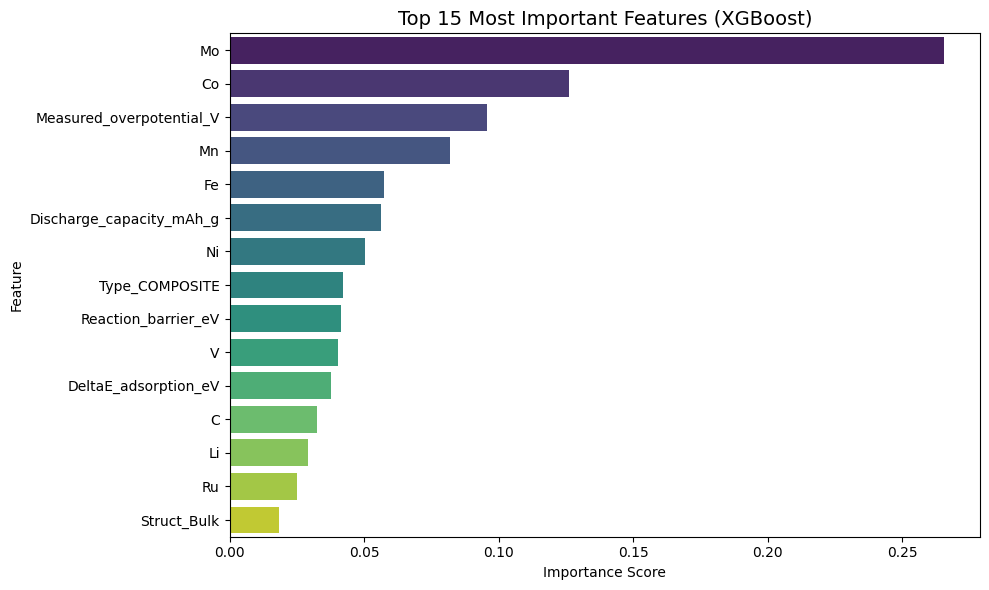

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=importances.head(15), y=importances.head(15).index, palette="viridis")
plt.title("Top 15 Most Important Features (XGBoost)", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

2. Confusion Matrix (Heatmap) 🔥
Action: Creates a heatmap visualization of the Confusion Matrix (cm).

Purpose: Offers a clear, color-coded visual understanding of classification errors (misclassifications) between the "Low," "Medium," and "High" performance classes.

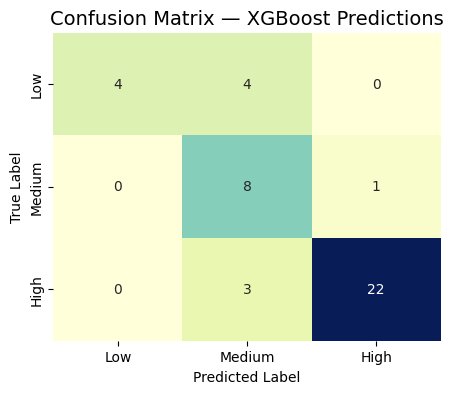

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False,
            xticklabels=["Low","Medium","High"],
            yticklabels=["Low","Medium","High"])
plt.title("Confusion Matrix — XGBoost Predictions", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

3. Label Distribution (Count Plot) ⚖️
Action: Creates two superimposed bar plots comparing the actual distribution of labels (y_test) against the predicted distribution (y_pred).

Purpose: Checks if the model is biased towards over-predicting or under-predicting any specific class.

/tmp/ipython-input-3916335582.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette="viridis", alpha=0.7, label="True")
/tmp/ipython-input-3916335582.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette="magma", alpha=0.5, label="Predicted")


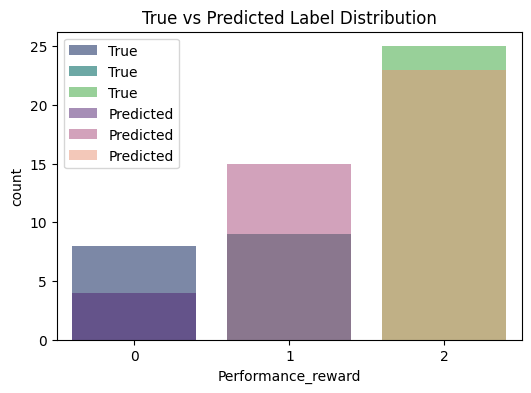

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_test, palette="viridis", alpha=0.7, label="True")
sns.countplot(x=y_pred, palette="magma", alpha=0.5, label="Predicted")
plt.title("True vs Predicted Label Distribution")
plt.legend()
plt.show()



4. Prediction Alignment (Scatter Plot) 📉
Action: Plots the true labels (y_test) versus the predicted labels (y_pred) across the sample indices.

Purpose: Provides a high-level visual check of how well the predicted values align with the true values across the entire test set.

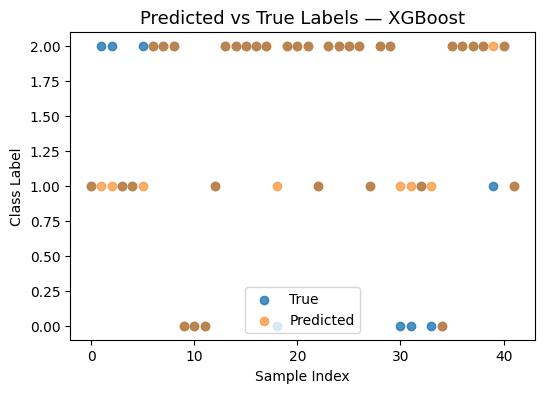

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(range(len(y_test)), y_test, label="True", alpha=0.8)
plt.scatter(range(len(y_pred)), y_pred, label="Predicted", alpha=0.6)
plt.title("Predicted vs True Labels — XGBoost", fontsize=13)
plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.legend()
plt.show()